In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x7oQfH18OYWFTQ8jG1iaL-O25_-7xh1gB20GlS-9dfHQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.au-syd.cloud-object-storage.appdomain.cloud')

bucket = 'f1-donotdelete-pr-faehhgfen3sgdm'
object_key = 'nsapallschemes.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,finyear,lgdstatecode,statename,lgddistrictcode,districtname,schemecode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
0,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,108,72,36,0,0,3,104,1,108,69
1,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNOAPS,8438,5059,3379,0,37,235,8083,83,8371,7190
2,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,202,0,202,0,1,15,180,6,200,159
3,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNDPS,310,211,99,0,0,77,200,33,234,110
4,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,5958,3958,2000,0,2,1347,4367,242,3875,2287
5,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNWPS,382,0,382,0,0,65,298,19,260,90
6,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNDPS,95,63,32,0,0,6,81,8,94,93
7,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNOAPS,5021,2911,2110,0,1,197,4443,380,5021,4935
8,2025-2026,1,JAMMU AND KASHMIR,11,PULWAMA,IGNWPS,304,0,304,0,0,20,260,24,304,258
9,2025-2026,1,JAMMU AND KASHMIR,12,RAJAURI,IGNDPS,78,52,26,0,5,5,68,0,72,3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [3]:

df = df_1.copy()

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
df.head()


Dataset Shape: (2156, 16)

Columns: Index(['finyear', 'lgdstatecode', 'statename', 'lgddistrictcode',
       'districtname', 'schemecode', 'totalbeneficiaries', 'totalmale',
       'totalfemale', 'totaltransgender', 'totalsc', 'totalst', 'totalgen',
       'totalobc', 'totalaadhaar', 'totalmobilenumber'],
      dtype='object')


,finyear,lgdstatecode,statename,lgddistrictcode,districtname,schemecode,totalbeneficiaries,totalmale,totalfemale,totaltransgender,totalsc,totalst,totalgen,totalobc,totalaadhaar,totalmobilenumber
0,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,108,72,36,0,0,3,104,1,108,69
1,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNOAPS,8438,5059,3379,0,37,235,8083,83,8371,7190
2,2025-2026,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNWPS,202,0,202,0,1,15,180,6,200,159
3,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNDPS,310,211,99,0,0,77,200,33,234,110
4,2025-2026,1,JAMMU AND KASHMIR,10,POONCH,IGNOAPS,5958,3958,2000,0,2,1347,4367,242,3875,2287


In [4]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 finyear               0
lgdstatecode          0
statename             0
lgddistrictcode       0
districtname          0
schemecode            0
totalbeneficiaries    0
totalmale             0
totalfemale           0
totaltransgender      0
totalsc               0
totalst               0
totalgen              0
totalobc              0
totalaadhaar          0
totalmobilenumber     0
dtype: int64


In [5]:

df = df.drop(['statename', 'districtname'], axis=1)


label_encoder = LabelEncoder()
df['finyear'] = label_encoder.fit_transform(df['finyear'])
df['schemecode'] = label_encoder.fit_transform(df['schemecode'])


X = df.drop('schemecode', axis=1)
y = df['schemecode']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [7]:
with open('nsap_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [8]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.97      0.97      0.97       151
           2       0.99      1.00      0.99       142

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



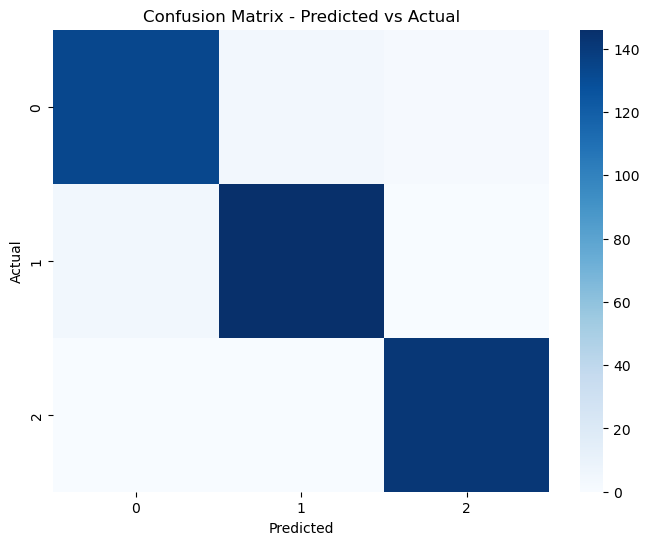

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix - Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Sample Comparison:
     Actual  Predicted
0        1          1
1        0          0
2        2          2
3        1          1
4        2          2
5        2          2
6        2          2
7        0          0
8        1          1
9        1          1
10       2          2
11       1          1
12       2          2
13       0          0
14       2          2
15       1          1
16       0          0
17       1          1
18       2          2
19       0          0


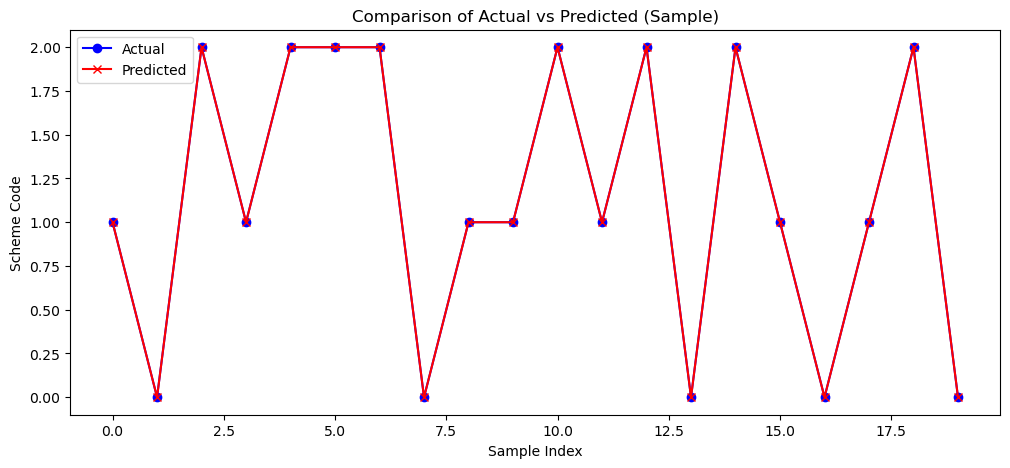

In [10]:
comparison_df = pd.DataFrame({
    'Actual': y_test[:20].values,
    'Predicted': y_pred[:20]
})
print("\nSample Comparison:\n", comparison_df)


plt.figure(figsize=(12,5))
plt.plot(range(20), comparison_df['Actual'], marker='o', label='Actual', color='blue')
plt.plot(range(20), comparison_df['Predicted'], marker='x', label='Predicted', color='red')
plt.title("Comparison of Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Scheme Code")
plt.legend()
plt.show()
